# Project: Titanic

## 目录
<ul>
<li><a href="#intro">提出问题</a></li>
<li><a href="#wrangling">调查数据</a></li>
<li><a href="#eda">探索与分析</a></li>
<li><a href="#conclusions">初步结论</a></li>
</ul>

<a id='intro'></a>
# 1.提出问题

> 问题： 有哪些因素会让船上的人生还率更高？

>对数据集初步了解，猜测有以下因素：

>1.性别

>2.年龄

>3.舱房等级

<a id='wrangling'></a>

# 2. 调查数据

## 2.1 读取数据源

In [1]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
sns.set(color_codes=True)

titanic_df = pd.read_csv('titanic-data.csv')
titanic_df.head()

Populating the interactive namespace from numpy and matplotlib


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2.2 数据整理
### 2.2.1 删除缺失值
>在整理数据前，检查数据的完整性

In [2]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


>本数据中Cabin缺失数据过多，全部不考虑，仅对Age一列进行清理

In [3]:
titanic_df.dropna(subset=['Age'],inplace=True)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
Cabin          185 non-null object
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 58.6+ KB


### 2.2.2 筛选数据
>考虑生还率的相关因素，可能是：

>1.年龄

>2.性别

>3.舱房等级

In [4]:
titanic_key_factors = titanic_df[['Survived', 'Pclass', 'Sex', 'Age']]
titanic_key_factors.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


<a id='eda'></a>
# 3.探索与分析

> 对上述考虑的三种因素分别进行分析：

>1.单因素分析

>2.双因素综合分析

<a id='intro'></a>
## 3.1 单因素分析

### 3.1.1 舱房等级

In [5]:
titanic_pclass = titanic_key_factors[['Survived', 'Pclass']]  #提取pclass信息
titanic_pclass.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


In [6]:
groupby_pclass = titanic_pclass.groupby('Pclass')# 按 Pclass 分组

In [7]:
total_groupby_pclass = groupby_pclass.count() # 各 Pclass 的总人数
total_groupby_pclass.rename(columns={'Survived':'Total'})

,Total
Pclass,
1,186
2,173
3,355


In [8]:
survived_groupby_pclass = groupby_pclass.sum() #各 Pclass 的生还数
survived_groupby_pclass

,Survived
Pclass,
1,122
2,83
3,85


In [9]:
survival_rate_pclass = groupby_pclass.mean() # 各 Pclass 的生还率
survival_rate_pclass.rename(columns={'Survived':'Survival Rate'})  

,Survival Rate
Pclass,
1,0.655914
2,0.479769
3,0.239437


Text(0,0.5,u'Count')

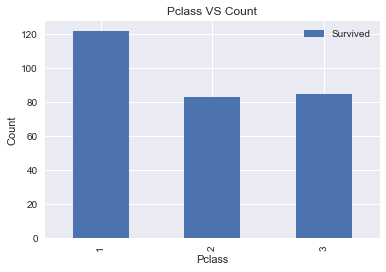

In [10]:
axe1_pclass = survived_groupby_pclass.plot(kind='bar')
axe1_pclass.set_title('Pclass VS Count')
axe1_pclass.set_ylabel('Count')

Text(0,0.5,u'Survival Rate')

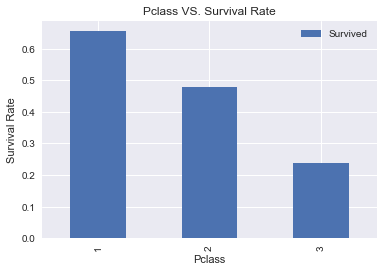

In [11]:
axe2_pclass = survival_rate_pclass.plot(kind='bar')
axe2_pclass.set_title('Pclass VS. Survival Rate')
axe2_pclass.set_ylabel('Survival Rate')

>说明：
一般来说，游轮舱房的设置，Pclass=1 的应该在上层， Pclass=2 的在中层， Pclass=3 在底层，则按常理推测，生还率会是按顺序递减，即 生还率(Pclass=1)
> 生还率(Pclass=2) > 生还率(Pclass=3) 
，从数据结果来看，符合这种递减趋势。可以将舱房等级视为生还的因素之一。

### 3.1.2 性别

In [12]:
titanic_sex = titanic_key_factors[['Survived', 'Sex']] #提取性别信息
titanic_sex.head()

,Survived,Sex
0,0,male
1,1,female
2,1,female
3,1,female
4,0,male


In [13]:
# 按 Sex 分组
groupby_sex = titanic_sex.groupby('Sex')

In [14]:
# 各 Sex 的总数
total_groupby_sex = groupby_sex.count()
total_groupby_sex.rename(columns={"Survived":"total"})

,total
Sex,
female,261
male,453


In [15]:
# 各 Sex 的生还数
survived_groupby_sex = groupby_sex.sum()
survived_groupby_sex

,Survived
Sex,
female,197
male,93


In [16]:
# 各 Sex 的生还率
survival_rate_sex = groupby_sex.mean().rename(columns={'Survived':'Survival Rate'})
survival_rate_sex

,Survival Rate
Sex,
female,0.754789
male,0.205298


Text(0,0.5,u'Count')

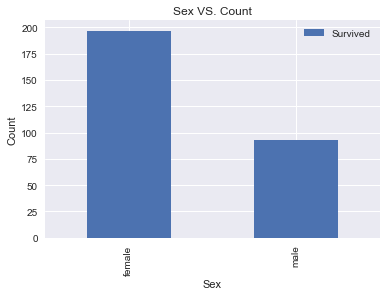

In [17]:
axe1_sex = survived_groupby_sex.plot(kind='bar')  #不同性别的生还数柱状图
axe1_sex.set_title('Sex VS. Count')
axe1_sex.set_ylabel('Count')

Text(0,0.5,u'Survival Rate')

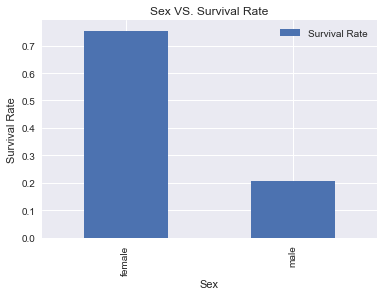

In [18]:
axe2_sex = survival_rate_sex.plot(kind='bar') #不同性别的生还率柱状图
axe2_sex.set_title('Sex VS. Survival Rate')
axe2_sex.set_ylabel('Survival Rate')

>说明：
 女性生还率接近男性生还率的四倍。女性生还数是男性的两倍以上。
 按常理推测，男性的强壮性比女性高，生存几率应该较大。出现这种情况，有可能是男性协助女性逃生，或者说将生存机会让给女性。

### 3.1.3 年龄

In [19]:
titanic_age = titanic_key_factors[['Survived', 'Age']] #提取年龄信息
titanic_age.head()

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0


In [20]:
def group_age(age, lim):
    '''
    将年龄数据 age 分组，按照组距 lim 进行
    '''
    group = int(age) / lim
    return ('[%d, %d)') % (group*10, group*10+10)

In [21]:
# 创建年龄分组
age_group = pd.DataFrame({
    "age_group":[group_age(age,10) for age in titanic_age.Age]
})

age_group.head()

,age_group
0,"[20, 30)"
1,"[30, 40)"
2,"[20, 30)"
3,"[30, 40)"
4,"[30, 40)"


In [22]:
groupby_age = pd.concat([titanic_age['Survived'], age_group], axis=1)  #将分组后的年龄和生还情况结合起来
groupby_age.head()

,Survived,age_group
0,0.0,"[20, 30)"
1,1.0,"[30, 40)"
2,1.0,"[20, 30)"
3,1.0,"[30, 40)"
4,0.0,"[30, 40)"


In [23]:
# 按年龄段分组的死亡数
dead_groupby_age = groupby_age[groupby_age.Survived==0].groupby('age_group').count()
dead_groupby_age.rename(columns={"Survived":"Dead"})

,Dead
age_group,
"[0, 10)",35
"[10, 20)",51
"[20, 30)",100
"[30, 40)",68
"[40, 50)",44
"[50, 60)",21
"[60, 70)",13
"[70, 80)",2
"[80, 90)",1


In [24]:
#按年龄段分组的生还数
survived_groupby_age = groupby_age[groupby_age.Survived==1].groupby("age_group").count()
survived_groupby_age

,Survived
age_group,
"[0, 10)",18
"[10, 20)",31
"[20, 30)",77
"[30, 40)",60
"[40, 50)",25
"[50, 60)",14
"[60, 70)",4
"[70, 80)",3


In [25]:
#将每一个年龄组的生还数和死亡数利用concat拼接在一起
titanic_age_group_count = pd.concat([dead_groupby_age.rename(columns={'Survived':'Dead'}),survived_groupby_age], axis=1) 
titanic_age_group_count=titanic_age_group_count.fillna(0)
titanic_age_group_count

,Dead,Survived
"[0, 10)",35,18.0
"[10, 20)",51,31.0
"[20, 30)",100,77.0
"[30, 40)",68,60.0
"[40, 50)",44,25.0
"[50, 60)",21,14.0
"[60, 70)",13,4.0
"[70, 80)",2,3.0
"[80, 90)",1,0.0


Text(0,0.5,u'Count')

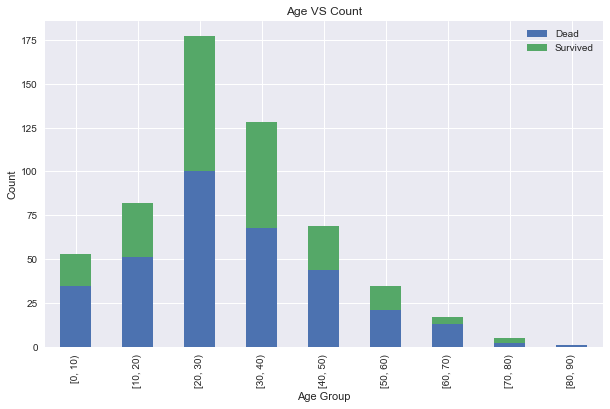

In [26]:
axe1_age_group = titanic_age_group_count.plot(kind='bar', stacked=True, figsize=(10,6)) #不同年龄组的生还-死亡数对比
axe1_age_group.set_title('Age VS Count')
axe1_age_group.set_xlabel('Age Group')
axe1_age_group.set_ylabel('Count')

>说明： 
就年龄已知的部分来看，几乎每一组的生还人数都远小于死亡人数。

>生还数量并不能很好地说明问题，以下对生还率与年龄的关系进行分析：

In [27]:
# 直接计算 Survived 的均值，即为生还率
survival_rate_groupby_age = groupby_age.groupby('age_group').mean()
survival_rate_groupby_age

,Survived
age_group,
"[0, 10)",0.339623
"[10, 20)",0.378049
"[20, 30)",0.435028
"[30, 40)",0.468750
"[40, 50)",0.362319
"[50, 60)",0.400000
"[60, 70)",0.235294
"[70, 80)",0.600000
"[80, 90)",0.000000


Text(0,0.5,u'Survival Rate')

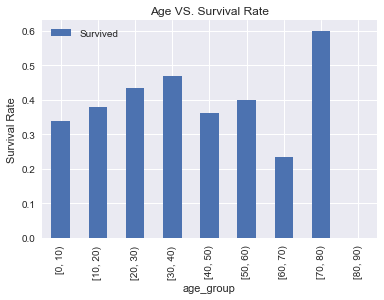

In [28]:
axe2_age_group = survival_rate_groupby_age.plot(kind='bar')
axe2_age_group.set_title('Age VS. Survival Rate')
axe2_age_group.set_ylabel('Survival Rate')

>说明: 

>就各年龄段的生存率来说，（70-80）这一组老龄人的生存几率最大（超过50%）。
>其它年龄段没有特别明显的差异，均小于50%。最低的是老龄人（60-70），生还率仅有23.53%。

Text(0.5,1,u'Proportion Of Survival Count in Age Group')

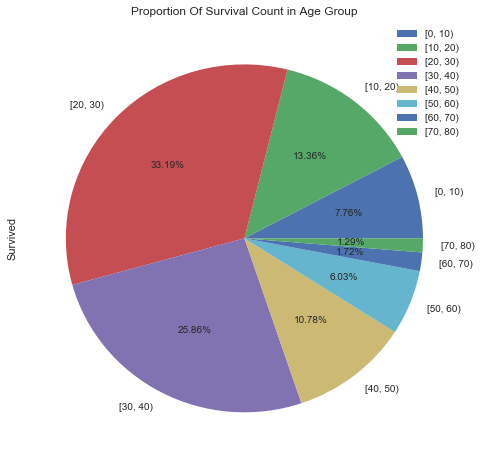

In [29]:
#各年龄组生还人数占整个生还人的比例
axe3_age_group = survived_groupby_age.plot(kind='pie',subplots=True, autopct='%.2f%%', figsize=(8, 8))[0]  
axe3_age_group.set_title('Proportion Of Survival Count in Age Group')

<a id='intro'></a>
## 3.2 双因素分析

### 3.2.1 舱房等级&性别

In [30]:
axe_pclass_sex_rate = titanic_key_factors.groupby(['Pclass', 'Sex'])['Survived'].mean()  #每个舱房等级中不同性别的生还率
axe_pclass_sex_rate

Pclass  Sex   
1       female    0.964706
        male      0.396040
2       female    0.918919
        male      0.151515
3       female    0.460784
        male      0.150198
Name: Survived, dtype: float64

Text(0,0.5,u'Survival Rate')

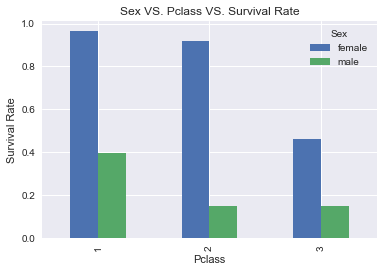

In [31]:
#不同舱房等级不同性别的生还率柱状图
axe1_pclass_sex_rate = titanic_key_factors.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack().plot(kind='bar')
axe1_pclass_sex_rate.set_title('Sex VS. Pclass VS. Survival Rate')
axe1_pclass_sex_rate.set_ylabel('Survival Rate')

In [32]:
#不同舱房等级不同性别的生还人数
axe_pclass_sex_num = titanic_key_factors.groupby(['Pclass', 'Sex'])['Survived'].sum()
axe_pclass_sex_num

Pclass  Sex   
1       female    82
        male      40
2       female    68
        male      15
3       female    47
        male      38
Name: Survived, dtype: int64

Text(0,0.5,u'Survival Rate')

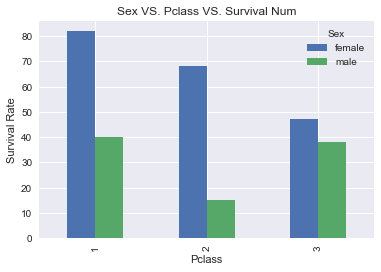

In [33]:
#不同舱房等级不同性别的生还人数的柱状图
axe1_pclass_sex_num = titanic_key_factors.groupby(['Pclass', 'Sex'])['Survived'].sum().unstack().plot(kind='bar')
axe1_pclass_sex_num.set_title('Sex VS. Pclass VS. Survival Num')
axe1_pclass_sex_num.set_ylabel('Survival Rate')

### 说明： 

>从上图可以得知，不管是男性还是女性，生还率随着舱房等级的提高而增大。从组内人数来看，3等舱存活的男性多于2等舱存活的男性。

### 3.2.2 性别&年龄

In [34]:
#在titanic_key_factors后面加上age_group这一列
bins = np.arange(0, 100, 10)
age_group_names = ['[0,10)', '[10,20)', '[20,30)', '[30,40)', '[40,50)', '[50,60)', '[60,70)', '[70,80)' ,'[80,90)']
titanic_key_factors['age_group'] = pd.cut(titanic_df['Age'], bins, labels=age_group_names, right=False)
titanic_key_factors.head()

,Survived,Pclass,Sex,Age,age_group
0,0,3,male,22.0,"[20,30)"
1,1,1,female,38.0,"[30,40)"
2,1,3,female,26.0,"[20,30)"
3,1,1,female,35.0,"[30,40)"
4,0,3,male,35.0,"[30,40)"


Text(0,0.5,u'Survival Rate')

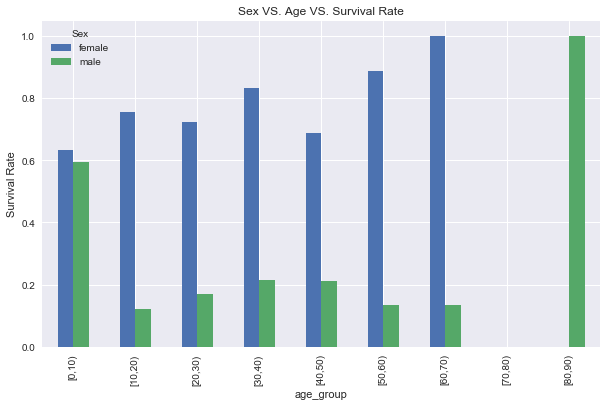

In [35]:
# 不同年龄组别中的男女生还率
axe_age_sex = titanic_key_factors.groupby(['age_group', 'Sex'])['Survived'].mean().unstack().plot(kind='bar', figsize=(10, 6))
axe_age_sex.set_title('Sex VS. Age VS. Survival Rate')
axe_age_sex.set_ylabel('Survival Rate')

Text(0,0.5,u'Survival Num')

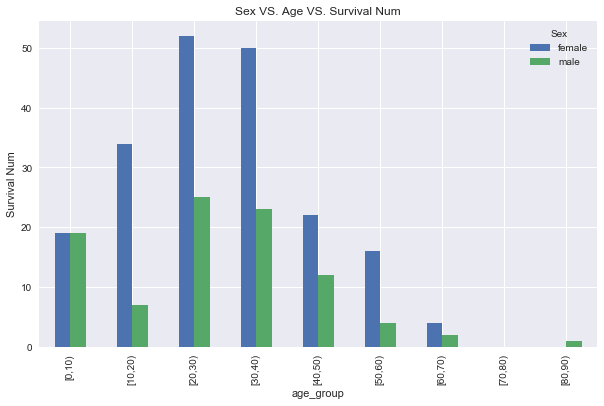

In [36]:
# 不同年龄组别中的男女生还数量
axe_age_sex_num = titanic_key_factors.groupby(['age_group', 'Sex'])['Survived'].sum().unstack().plot(kind='bar', figsize=(10, 6))
axe_age_sex_num.set_title('Sex VS. Age VS. Survival Num')
axe_age_sex_num.set_ylabel('Survival Num')

>从上图可得知：
>不论性别，儿童生还率都较高（超过50%）

>对于超过10岁的人来说，除了80-90那一组，不论年龄，女性生还率远高于男性

>除了两端年龄外，每一组都是女性生还率高，并且生还数量也高，这也验证了在单变量分析中提到的可能是男性协助女性逃生，或者说将生存机会让给女性。

### 3.2.2 舱房等级&年龄

Text(0,0.5,u'Survival Rate')

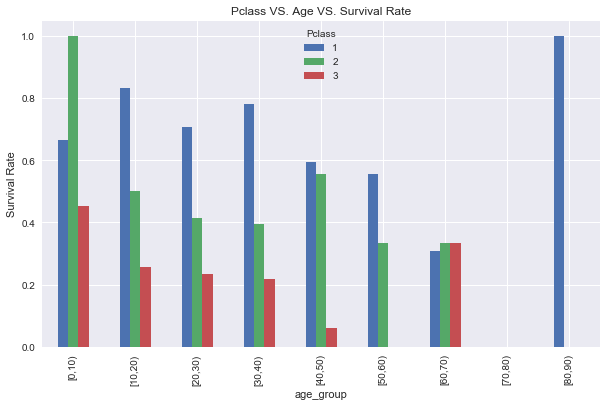

In [37]:
# 不同年龄组别不同舱房中人的生还率
axe_age_pclass_rate = titanic_key_factors.groupby(['age_group', 'Pclass'])['Survived'].mean().unstack().plot(kind='bar', figsize=(10, 6))
axe_age_pclass_rate.set_title('Pclass VS. Age VS. Survival Rate')
axe_age_pclass_rate.set_ylabel('Survival Rate')

Text(0,0.5,u'Survival Num')

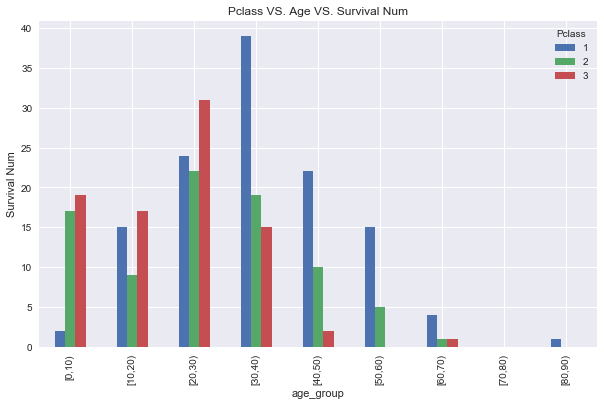

In [38]:
# 不同年龄组别中不同舱房中的生还数量
axe_age_pclass_num = titanic_key_factors.groupby(['age_group', 'Pclass'])['Survived'].sum().unstack().plot(kind='bar', figsize=(10, 6))
axe_age_pclass_num.set_title('Pclass VS. Age VS. Survival Num')
axe_age_pclass_num.set_ylabel('Survival Num')

>由上图可得出：

>1.总体上来说，生还率随着舱房等级的提高而增大

>2.虽然生还率随着舱房等级的提高而增大，但(0,10](10,20](20,30]这三个年龄段中，3等舱的生还人数高于1等舱的生还人数，这很大可能是因为这几个年龄段中，在1等舱的人数较少。

>3.分析年龄两端数据 

>无论舱房等级，老年人60-70那一组的生还率很接近（但生还率均比较低）

>对于儿童（10岁以下），Pclass=2的生还率比Pclass=1高，有点偏离规律，下面进一步分析


In [39]:
titanic_key_factors[(titanic_key_factors['age_group'] == "[0,10)") & (titanic_key_factors['Pclass'] == 1)]

,Survived,Pclass,Sex,Age,age_group
297,0,1,female,2.00,"[0,10)"
305,1,1,male,0.92,"[0,10)"
445,1,1,male,4.00,"[0,10)"


In [40]:
titanic_key_factors[(titanic_key_factors['age_group'] == '[0,10)') & (titanic_key_factors['Pclass'] == 2)]

,Survived,Pclass,Sex,Age,age_group
43,1,2,female,3.00,"[0,10)"
58,1,2,female,5.00,"[0,10)"
78,1,2,male,0.83,"[0,10)"
183,1,2,male,1.00,"[0,10)"
193,1,2,male,3.00,"[0,10)"
237,1,2,female,8.00,"[0,10)"
340,1,2,male,2.00,"[0,10)"
407,1,2,male,3.00,"[0,10)"
530,1,2,female,2.00,"[0,10)"
535,1,2,female,7.00,"[0,10)"


>从上述表格得知：

>1.10岁以下儿童中，Pclass=1只有三位，而其中一位没有生还，从而导致生还率偏低（相对于Pclass=2来说，其中这个年龄段的所有人都生还了）

>2.合理猜测是由于某些意外，这位年龄小的儿童未能生还。

<a id='intro'></a>
## 3.3 分析小结

>从上述分析结果来看，可得出以下几个结论：

>1.舱房等级越高，则生还率越高，不论年龄、性别

>2.不论年龄、舱房等级，女性生还率最高

>3.儿童的生还率较高，与性别、舱房等级无关

<a id='conclusions'></a>
# 4.初步结论

>通过对泰坦尼克号上 2224 名乘客和船员中 891 名的人口学数据和乘客基本信息的分析，对于问题“有哪些因素会让船上的人生还率更高？”得出以下初步结论：

>1.舱房等级、性别、年龄是影响生还率的因素

>2.住高等级舱房的女性，其生还率是最高的；其次则为儿童（与性别、舱房等级无关）

>然而，由于不清楚样本是否随机选取、样本量不大，且样本数据中存在信息缺失，初步结论并无法表明这三个因素与“生还率”具有相关性。